**필사 노트**
 
 Word2vec, Glove, FastText (word embeddings) : https://www.kaggle.com/nkitgupta/text-representations 


분류 모델링
* https://www.kaggle.com/himanshutripathi/covid-19-tweets-analysis-97-accuracy
* https://www.kaggle.com/ludovicocuoghi/twitter-sentiment-analysis-with-bert-roberta 

**감정분석**

감정분석은 문서의 주관적인 감정, 의견, 기분을 파악하기 위한 방법으로 소셜 미디어, 온라인 리뷰 등 다양한 분야에서 사용된다. 문서 내 텍스트가 나타내는 단어와 문맥을 기반으로 감정 수치를 계산하여 긍정 또는 부정을 결정한다. 분석기법으로는 LSTM, BERT 모델 등을 사용한다. 

[**Architecture**](https://yngie-c.github.io/nlp/2020/07/31/sentiment_analysis/) 

감정분석은 크게 두 단계로 이루어져 있다. 

1. 문장의 어떤 부분에 의견이 담겨있는지를 정의 
  * 4가지 요소 찾기 : 분석 대상이 되는 개체, 감성, 표현하는 주체, 발화시점 
  * 의견 : 일반 의견(대상이 하나로, 직접적인 의견 - 이 제품 좋다, 간접적인 의견 - 이 제품 잘 작동한다 로 나눠볼 수 있다) , 비교 의견(2개 이상의 대상을 언급하며 서로에 대한 의견을 나타냄) 

2. 모아진 의견을 요약 


**Flow chart** 

![1](https://user-images.githubusercontent.com/45377884/99493457-96737a80-29b2-11eb-9d84-a0bc252b7146.jpg) 


> 감정 분석 시스템의 순서도 

**감정분석 방법론**

![2](https://user-images.githubusercontent.com/45377884/88989668-1cda5280-d317-11ea-8704-6c6555e171c1.png) 


> 크게 어휘기반(Lexicon) 의 감정분석과 머신러닝 기반 (ML) 의 감정분석으로 나눌 수 있다. 최근에는 BERT 와 같은 트랜스포머 계열 신경망 모델이 많이 사용되고 있다. 



1. **어휘 기반의 감정분석**

  1-1. 감정 사전을 수동으로 구축 : 각 단어가 가지는 긍/부정의 정도를 -1(부정) 부터 1(긍정) 사이의 점수로 레이블링한다. 감성이 들어갈 수 있는 품사인 명사,형용사,동사 키워드를 추출해 긍/부정 레이블링을 진행한다. 도메인에 따라 사용하는 어휘 및 긍부정 점수가 달라질 수 있다. 
  
  1-2. 사전 기반 접근 : 외부 사전을 가져와 사용한다. 그러나 이 방법은 도메인 확장성이 없다는 단점이 있다. 예를 들어, 영화 리뷰 데이터에서 “졸리다” 라는 단어는 부정적인 의미를 가지지만, 침대 상품평에서는 긍정적인 의미를 가진다. 

  1-3. 말뭉치 기반 접근 : 말뭉치에 맞는 감성 어휘를 재구축. 도메인 의존성을 극복할 수 있지만, 사전 구축을 위해 많은 데이터를 필요로 한다는 단점이 있다. 


2. **ML 기반의 감정분석**

  2-1. 회귀분석을 통해 사전을 구축 

  2-2. 준지도학습 방법 

    특정 개수의 단어는 미리 레이블링하고, 나머지 단어에 대해 적용

    * 감성 그래프 : 고차원 단어를 저차원으로 임베딩하여 거리 기반의 각 단어 사이의 네트워크 구축 
    * 자가학습 : 미리 레이블링된 어휘로만 분류기를 학습하고, 정답이 없는 어휘에 분류기를 적용해 반복 학습 

    ![3](https://user-images.githubusercontent.com/45377884/88989672-1ea41600-d317-11ea-88fc-f9078c7a98ff.png)

>    자가학습 example



3. **NN 기반의 감정분석**



**?** 감정 분석과 감정 분류는 다른 것? 감정 분석은 labeling 하는거고 분류는 label 이 있는 상태에서 분류 모델을 위주로 하는것? 



# Embeddings Note _week4


**OOV 문제란**

* NLP에서 빈번히 발생하는 데이터 문제로 input language가 database 혹은 input of embedding에 없어서 처리를 못 하는 것.

* 새로운 단어 토큰이 들어왔을 때 vocabulary에 없을 경우 <UNK> unknown token을 반환한다.

* 이 문제를 해결하기 위해 embedding 방식으로 word embedding이 아니라 character embedding이 사용되기도 한다.

## 1. Intro 

**Text Representation** 
* ML/NLP 알고리즘에 학습시킬 수 있도록 원문 텍스트를 수치적 형태로 변환하는 과정 
* 이 노트에선 text representation 의 장단점을 살펴보고 task 에 맞는 방법을 선택할 수 있는 스키마를 제공하고자 한다. 


![image](https://www.oreilly.com/library/view/practical-natural-language/9781492054047/assets/pnlp_0301.png)

* dot box 에 해당하는 부분을 집중적으로 다뤄보도록 한다. 

## 2. Clean Dataset 

In [ ]:
import pandas as pd 
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
clean_data = pd.read_csv('Tweets.csv')

In [ ]:
clean_data.head()

# airline_sentiment 감정
# text 텍스트 원문 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

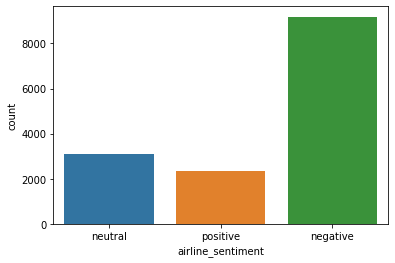

In [ ]:
sns.countplot(x = 'airline_sentiment', data = clean_data)

# class imbalance 

## 3. Text pre processing 

1. stopwords 불용어 제거 
  * 영어 불용어 :  a, an, the, as, in, on, etc.
  * 구체적인 의미를 지니지 않은 단어들은 제거 

2. lower casing 소문자로 변경 
  * to reduce vocabulary size 

3. Stemming 어근 추출 
  * 접미사 suffix 제거 
  * 예. walking ---> walk 로 원형 추출

4. 토큰화
  * text 를 문장이나 단어(토큰) 으로 쪼개어 분석하기 위함 

In [ ]:
waste_col = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

data = clean_data.drop(waste_col, axis=1)

In [ ]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
# 감정 레이블 1,-1,0 변환 함수 만들기
def sentiment(x) : 
  if x == 'positive' : 
    return 1 
  elif x == 'negative' : 
    return -1 
  else : 
    return 0 

In [ ]:
nltk.download('stopwords') 
from nltk.corpus import stopwords 
stopwords = stopwords.words('english') 

tags = r'@\w*' 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sentence_ex = [re.sub(tags,"",data.text[1])]
for word in sentence_ex :
  
  if word not in stopwords : # you've, to, the 등 불용어 제거가 되지 않음 --> 기존 노트 코드에서 split 추가 

    print(word) 

 plus you've added commercials to the experience... tacky.


In [ ]:
from nltk.stem import SnowballStemmer # 영어 외의 13개 국가의 언어에 대한 stemming 을 지원 
# Stemming 은 단어에서 접사를 제거하는 것을 말하며, 검색엔진에서 색인할 때 가장 많이 쓰인다. 
from nltk.tokenize import RegexpTokenizer # 정규 표현식을 사용해서 단어 토큰화를 수행
# 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규 표현식을 넣어서 토큰화를 수행

stemmer = SnowballStemmer('english') 
tokenizer = RegexpTokenizer(r'\w+') 

In [ ]:
sentence_ex = re.sub(tags,"",data.text[1])
sentence_ex = sentence_ex.split(' ') # 추가한 부분 

text=[]

for word in sentence_ex :
  
  if word not in stopwords : # 불용어 제거가 되지 않음 --> 기존 노트 코드에서 split 추가 

    print(word)

    text.append(word.lower())  # 접사제거, 소문자화 
  
print(tokenizer.tokenize(" ".join(text)))


plus
added
commercials
experience...
tacky.
['plus', 'added', 'commercials', 'experience', 'tacky']


In [ ]:
# 트위터 text 이므로 태그가 많다. 따라서 이것을 제거하고자 한다. 
tags = r'@\w*' 

def preprocess_text(sentence, stem=False) : 

  sentence = re.sub(tags,"",sentence) # @ 태그 삭제 --> ['string'] 리스트 안에 한개의 string 이 들어가있는 형태 
  sentence = sentence.split(' ')

  text = [] 

  for word in sentence : 

    if word not in stopwords : 

      if stem : 
        text.append(stemmer.stem(word).lower()) # 접사제거, 소문자화 

      else : 
        text.append(word.lower()) 
  
  return tokenizer.tokenize(" ".join(text)) # 토큰화 

In [ ]:
data.text = data.text.map(preprocess_text) 
data.head()

,airline_sentiment,text
0,neutral,"[what, said]"
1,positive,"[plus, added, commercials, experience, tacky]"
2,neutral,"[i, today, must, mean, i, need, take, another,..."
3,negative,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,"[really, big, bad, thing]"


## 4. One-Hot encoding 

**원핫인코딩**

* Each word is then represented by a V dimensional binary vector of 0s and 1s.

![1](https://miro.medium.com/max/886/1*_da_YknoUuryRheNS-SYWQ.png)

In [ ]:
sample_vocab = ['the', 'cat', 'sat', 'on', 'mat', 'dog', 'run', 'green', 'tree']

In [ ]:
data_vocab = []
for text in data.text : 
  for word in text : 
    if word not in data_vocab : 
      data_vocab.append(word)

In [ ]:
def get_onehot_representation(text, vocab = data_vocab) : 
  onehot_encoded = [] 

  for word in text : 
    temp = [0]*len(vocab) 
    temp[vocab.index(word)-1] = 1 # 0은 -1로 맨 뒤에 위치 (the)
    # vocab.index(word) : 원소 word 의 인덱스를 반환 
    onehot_encoded.append(temp) 
  return onehot_encoded 

print('One hot representation for sentence \n the cat sat on the mat: ') 

get_onehot_representation(['the', 'cat', 'sat', 'on', 'the', 'mat'], sample_vocab) # 샘플단어로 원핫인코딩 해보기 

# 6 행 9열 --> 행 : 입력 단어 리스트의 단어 개수, 열 : 기준이 되는 단어 리스트 

One hot representation for sentence 
 the cat sat on the mat: 


[[0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0]]

In [ ]:
data_vocab.index('commercials') # .index('찾고자하는 원소')  ---> 원소의 인덱스를 반환 

4

In [ ]:
data_vocab[:10]

['what',
 'said',
 'plus',
 'added',
 'commercials',
 'experience',
 'tacky',
 'i',
 'today',
 'must']

In [ ]:
len(data_vocab) # 트윗에는 14267 단어가 존재 (구별되는 단어)

14267

14267 개의 구별되는 단어가 있다는 것은 원핫 인코딩의 schema 가 14267-차원의 벡터가 생성된다는 의미이다. 만약 20개의 단어로 구성된 문장을 표현한다고 하면, (20, 14267) 차원의 행렬을 나타나게 된다. 

In [ ]:
data.text[7]

['really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hats',
 'parody',
 'there',
 'https',
 't',
 'co',
 'mwpg7grezp']

In [ ]:
len(data.text[7])

13

In [ ]:
sample_one_hot_rep = get_onehot_representation(data.text[7], data_vocab) 
print(f'Shapes of a single sentence : {np.array(sample_one_hot_rep).shape}')

Shapes of a single sentence : (13, 14267)


In [ ]:
data.head()

,airline_sentiment,text
0,neutral,"[what, said]"
1,positive,"[plus, added, commercials, experience, tacky]"
2,neutral,"[i, today, must, mean, i, need, take, another,..."
3,negative,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,"[really, big, bad, thing]"


원핫 인코딩은 이해하기에 직관적이다. 하지만 다음과 같은 단점이 존재한다. 

1. 실제 단어 사이즈는 수십만개까지 갈 수 있기 때문에 차원의 크기가 너무 커질 수 있다. 

2. text 에 대해서 고정된 길이의 representation 을 할 수 없다. 예를들어 문장 하나에 32개의 단어들이 있을 수 있고, 혹은 다른 문장엔 40개의 단어가 있을 수 있다. 그러면 차원 자체가 다양해지는데, 알고리즘을 학습할 땐, 피처 벡터가 동일한 길이를 가져야 한다. 

3. 원핫인코딩은 0,1 로 벡터 값을 지정하기 때문에 동일한 가중치를 부여한다. 단어의 중요성을 반영할 수 없다. 

4. 원핫인코딩 표현 방식은 임베딩 방식과 달리 단어의 의미를 전혀 표현하지 않는다. 

5. 학습된 어휘에 존재하지 않는 단어가 포함된 텍스트가 존재하는 Out of Vocab 문제가 존재한다. 

## 5. Bag of Words 

**BOW**

고전적인 text representation 방법으로, NLP 특히 텍스트 분류 문제에 많이 사용된다. 핵심 아이디어는 '순서와 문맥을 무시하고 (ignoring the order and context)' 단어들을 마치 하나의 가방에 넣은 것처럼 표현하는 방법이다. 원핫인코딩과 같이 특정한 integer ID 를 사용하는데, 여기선 각 document 가 index 가 되는 것이 특징이다. 

특정 문서에 해당 단어가 몇번 등장하는지 **count 한 숫자**가 행렬값이 된다. 

![2](https://miro.medium.com/max/1400/1*3IACMnNpwVlCl8kSTJocPA.png) 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sample_bow = CountVectorizer() 

sample_corpus =  ["the cat sat", "the cat sat in the hat", "the cat with the hat"] 

sample_bow.fit(sample_corpus) 

def get_bow_representation(text):
  return sample_bow.transform(text)

print(f'vocab : \n {sample_bow.vocabulary_}') # Countervectorizer 의 vocab dict 출력 : {단어 : index}


print("\n bag of word representation of sentence 'the cat cat sat in the hat'")
print(get_bow_representation(["the cat cat sat in the hat"]).toarray()) # document 적용 

# cat(idx 0), hat(idx 1), in (idx 2), sat (idx 3), the (idx 4), with (idx 5)

# the cat cat sat in the hat 

# ---> the : 2개, cat : 2개, sat : 1개, hat : 1개, in : 1개, with :0개

vocab : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

 bag of word representation of sentence 'the cat cat sat in the hat'
[[2 1 1 1 2 0]]


Countervectorizer 에는 ``binary=True`` 옵션이 있는데, 이는 빈도수를 나타내지 않고 그냥 단어가 텍스트에 존재 하는지 안하는지에 대한 여부만 나타내도록 한다. 

In [ ]:
sample_bow = CountVectorizer(binary = True) 

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_bow.fit(sample_corpus)

def get_bow_representation(text):
        return sample_bow.transform(text)

print(f'vocab : \n {sample_bow.vocabulary_}') # Countervectorizer 의 vocab dict 출력 : {단어 : index}

print("\n bag of word representation of sentence 'the the the the cat cat sat in the hat'")
print()
print(get_bow_representation(["the the the the cat cat sat in the hat"]).toarray())

vocab : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

 bag of word representation of sentence 'the the the the cat cat sat in the hat'

[[1 1 1 1 1 0]]


In [ ]:
data.loc[:, 'text'].astype('str')

0                                         ['what', 'said']
1        ['plus', 'added', 'commercials', 'experience',...
2        ['i', 'today', 'must', 'mean', 'i', 'need', 't...
3        ['really', 'aggressive', 'blast', 'obnoxious',...
4                        ['really', 'big', 'bad', 'thing']
                               ...                        
14635    ['thank', 'got', 'different', 'flight', 'chica...
14636    ['leaving', '20', 'minutes', 'late', 'flight',...
14637    ['please', 'bring', 'american', 'airlines', 'b...
14638    ['money', 'change', 'flight', 'answer', 'phone...
14639    ['8', 'ppl', 'need', '2', 'know', 'many', 'sea...
Name: text, Length: 14640, dtype: object

In [ ]:
# 트위터 예제에 적용해보기 

bow = CountVectorizer() 
bow_rep = bow.fit_transform(data.loc[:, 'text'].astype('str')) 
len(bow.vocabulary_)

14229

In [ ]:
print(f"Shape of Bag of word representaion matrix : {bow_rep.toarray().shape}")

Shape of Bag of word representaion matrix : (14640, 14229)


In [ ]:
data.shape

(14640, 2)

BOW 는 각 모든 document 에 대해 14229 길이의 고정된 벡터를 표현할 수 있다. 그러나 차원이 너무 크다. 

**장점**

1. 원핫인코딩처럼 BoW도 이해하기 직관적이고 쉽다. 

2. 텍스트를 수치적으로 표현하는데 있어서 document 별로 동일한 단어 리스트에 대해 차원을 표현할 수 있기 때문에 유클리디안 거리를 계산해 document 별로 계산할 수 있다. 

예시. 
```
S1 = "cat on the mat" --> BoW Representation --> {0 1 1 0 1 0 1}
S2 = "mat on the cat" --> BoW Representation --> {0 1 1 0 1 0 1}
S3 = "dog in the mat" --> BoW Representation --> {0 1 0 1 1 1 0}
```

S1과 S2 의 길이는 0 (즉 동일한 문장 구성이라 볼 수 있음) , S1과 S3의 길이는 2로 계산할 수 있다. 즉, BoW 로 계산한 벡터 공간을 통해서, 문서의 의미적 유사성 (semantic similarity) 를 표현할 수 있게 된다. 따라서 만약 문서가 비슷한 단어들을 포함하고 있다면, 벡터 공간 내에서 가까이 위치하고 있음을 알 수 있다. 


3. 길이가 다른 문장에 대해서도 (any sentence of arbitrary length) 고정된 길이 (fixed-length) 벡터를 얻을 수 있다. 



**단점**


1. 단어의 수가 증가할 수록 벡터의 크기도 증가한다. 따라서 원핫인코딩처럼 sparsity (0처럼 빈 벡터 값이 많다는 문제) 의 문제가 여전히 존재한다. sparsity의 문제를 해결하는 방법으론 가장 빈도수가 높은 N 개 단어들을 제한하는 방법도 있다. 


2. 의미는 같은 구별되는 단어들 (ex. walk, walked, walking) 사이의 유사성을 포착하지 못한다. 


3. 앞서 원핫인코딩에서도 말했던 out of vocabulary (OOV) 문제를 해결할 수 없다.

4. 단어의 순서(order) 에 대한 정보를 잃는다. 예를들어 위의 예제에서 S1 과 S2 에서 mat 과 cat 에 대한 순서의 다름을 포착해내지 못한다. 



## 6. Bag of N grams _ context & order

* N-gram 방법은 단어의 순서(order)와 문장의 문맥(context) 를 반영하도록 한다. 

* Bow 방법은 n-gram 에서 n 이 1일때를 의미하는 n-rgma 의 특수한 경우에 해당한다. 

* N-gram 예제

![1](https://i.stack.imgur.com/8ARA1.png) 


In [ ]:
# Unigram 

from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (1,1)) 

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus) 

def get_boN_representation(text) : 
  return sample_boN.transform(text) 

print(f"Unigram vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")

print("\n Bag of 1-gram Representation of sentence 'the cat cat sat in the hat'")

print(get_boN_representation(['the cat cat sat in the hat']).toarray())

Unigram vocabulary mapping for given sample corpus : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

 Bag of 1-gram Representation of sentence 'the cat cat sat in the hat'
[[2 1 1 1 2 0]]


In [ ]:
# bigram (2-gram) 

sample_boN = CountVectorizer(ngram_range = (2,2)) 
sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"] 

sample_boN.fit(sample_corpus)  

def get_boN_representation(text):
        return sample_boN.transform(text)


print(f"Bigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 2-gram (bigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

Bigram Vocabulary mapping for given sample corpus : 
 {'the cat': 4, 'cat sat': 0, 'sat in': 3, 'in the': 2, 'the hat': 5, 'cat with': 1, 'with the': 6}

Bag of 2-gram (bigram) Representation of sentence 'the cat cat sat in the hat'
[[1 0 1 1 1 1 0]]


In [ ]:
# trigram (3-gram) 

from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (3, 3))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)
    
print(f"Trigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 3-gram (trigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

Trigram Vocabulary mapping for given sample corpus : 
 {'the cat sat': 4, 'cat sat in': 0, 'sat in the': 3, 'in the hat': 2, 'the cat with': 5, 'cat with the': 1, 'with the hat': 6}

Bag of 3-gram (trigram) Representation of sentence 'the cat cat sat in the hat'
[[1 0 1 1 0 0 0]]


**장점**

1. 문맥(context) 과 단어의 순서(word - order) 에 대한 정보를 포함시킬 수 있다. 

2. 따라서 의미적 유사성(semantic similarity)을 벡터 공간에 표현할 수 있게 된다. 유사한 n-gram 을 가진 문서들은 완전히 다른 n-gram 을 가진 문서들보다 유클리디안 공간에서 더 가까운 벡터를 가졌다고 해석할 수 있다. 

**단점**
1. n 이 증가할수록 차원은 매우 빠르게 증가하여 sparsity 가 생길 수 밖에 없다. 

2. OOV ( out of vocabulary ) 문제 해결 역시나 불가능 


## 7. TF-IDF _ importance 

* 앞전 방법들은 모든 text 에 대해 동일한 가중치 (일부 단어가 다른 단어보다 더 중요하다는 개념이 포함되지 않았음) 를 부여했다면, TF-IDF 는 단어의 중요성을 포함하는 방법이다. 

* corpus 와 document 에서 다른 단어와 비교했을 때, 주어진 단어의 중요성(importance) 을 수치화해 반영하고자 한다. 


* 특정 문서에만 빈번하게 나타나고, 다른 문서에는 빈도수가 적다면 그 단어는 특정 문서에서 중요한 단어라고 볼 수 있다. 이러한 아이디어에 착안해 TF 와 IDF 개념을 도입하여, 각 단어마다 두 값을 곱하여 TF-IDF score 를 계산한다. 

* TF : how often a term or word occurs in a given document.

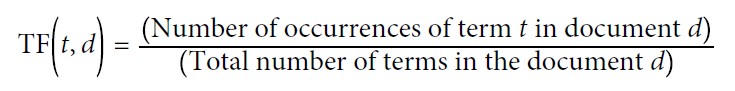 

* IDF : (inverse document frequency) measures the importance of the term across a corpus. TF 를 계산할 땐, 모든 각 단어에 대해 카운트를 할 때 동일한 가중치를 부여하는데, 예를들어 is, are, am 과 같은 단어들은 중요한 의미를 가지고 있진 않지만 빈번하게 문서에 등장할 수 있다. 이러한 경우를 고려하여 IDF 를 계산해 곱한다.

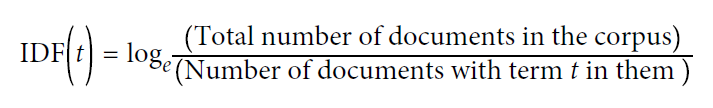


* 계산 예제

  * Sentence A = The Car is Driven on the Road
  * Sentence B = The Truck is Driven on the highway

  ![4](https://cdn-media-1.freecodecamp.org/images/1*q3qYevXqQOjJf6Pwdlx8Mw.png) 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer() 

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]
tfidf_rep = tfidf.fit_transform(sample_corpus) 

print(tfidf.vocabulary_)
print()
print(f'IDF Values for sample corpus : {tfidf.idf_}')
print()
print('TF-IDF Representation for sentence "the cat sat in the hat" : ')


print(tfidf.transform(['the cat sat in the hat']).toarray())

{'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

IDF Values for sample corpus : [1.         1.28768207 1.69314718 1.28768207 1.         1.69314718]

TF-IDF Representation for sentence "the cat sat in the hat" : 
[[0.29903422 0.385061   0.50630894 0.385061   0.59806843 0.        ]]


* 값 해석 : TF-IDF는 TF와 IDF를 곱한 값으로 점수가 높은 단어일수록 다른 문서에는 많지 않고 해당 문서에서 자주 등장하는 단어를 의미한다. (값이 높을수록 해당 문서에서 더 중요한 단어라고 볼 수 있음) 

* BoW 와 같이, TF-IDF 벡터도 Euclidean distance 또는 cosine similarity 같은 유사도 측정지수로 사용하여 두 텍스트간의 유사도를 계산하는데 사용할 수 있다. 

* 정보 검색 (information retrieval) 이나 텍스트 분류에 많이 사용된다. 

* 다만 TF-IDF가 단어 간 유사성을 포착한다는 측면에서 앞에서 살펴본 벡터화 방식보다 우수하지만 여전히 고차원성 (high dimensionality) 의 저주가 존재한다. 

**장점**
1. 임의의 길이를 가진 모든 문장에 대해서 고정된 길이의 벡터로 인코딩할 수 있다. 
2. 문장의 의미를 반영할 수 있다. 

**단점**

1. 다른 기법들에 비해 구현이 쉽진 않다. 
2. 단어의 수가 증가할수록 차원도 증가한다. 
3. 이 기법도 역시 OOV 문제를 해결할 수 없다. 




## 8. word embedding 

**Word Embeddings** 

* [워드 임베딩](https://wikidocs.net/33520) : 희소(sparsity) 표현이 아닌, 사용자가 정의한 차원에 맞게 밀집 표현 (벡터의 차원을 단어 집합의 크기로 상정하지 않고 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춘다) 이 가능하다. **[저차원 표현이 가능]** 이와 같이 단어를 밀집벡터 형태로 표현하는 방법을 워드 임베딩이라고 한다. 또한 워드 임베딩을 분산 표현 방식이라고 하는데 단어의 의미를 다차원 공간에 벡터화하는 방법을 사용한다는 의미에서 그렇게 칭하기도 한다. 
  * 분산표현 방법은 분포가설이라는 가정 하에 만들어진 표현방법으로,  **'비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다'** 라는 가정을 도입한다. (ex. 강아지 - 귀엽다, 예쁘다, 애교 등 : 해당 단어 벡터들은 유사한 벡터값을 가진다) 

![9](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FzNikb%2FbtqAAFPk7su%2FXhncXpFHii3qOr4kwVRU71%2Fimg.png)

  * 요약 : 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 **저차원**에 단어의 의미를 여러 차원에다가 분산 하여 표현한다.이런 표현 방법을 사용하면 **단어 벡터 간 유의미한 유사도를 계산**할 수 있게된다. 

  

  * 방법론 : LSA, Word2Vec, FastText, Glove 


![5](https://t1.daumcdn.net/cfile/tistory/240DA34C594F915508) 

* 위와 같이 cat이나 mat같은 단어를 특정 차원의 벡터로 바꾸어주는 것이다. 단어가 의미있는 벡터로 변한다. 비슷한 두 개의 단어는 비슷한 벡터로 바뀐다. 

![6](https://t1.daumcdn.net/cfile/tistory/224F404C594F916303)

* Word embedding 은 위와같이, 단어 사이의 유사성을 잡아낼 수 있다. 


### 8-1. Word2vec (by goggle)

**Word2vec**

* 큰 말뭉치로부터 단어 관계성을 학습하는 신경망 모델을 사용하는 알고리즘이다. 우리가 사용하는 모듈은 사전학습된 단어 임베딩이다. (누군가가 위키피디아, 웹, 뉴스 등등에 존재하는 단어들을 미리 학습시켜놓음) 

* 단어의 의미를 벡터 공간에 투영해 비슷한 의미를 가진 단어들끼리는 군집화되고 다른 의미를 가지는 단어들끼리는 공간상에서 멀리 떨어져 있도록 벡터화 한다. 


* 사전훈련된 임베딩 모델 종류
  * Word2vec by Google
  * Glove by Stanford 
  * fasttext by Facebook 



In [ ]:
# 코드 실행은 데이터 파일이 너무 크고 오래걸려서 PASS

from gensim.models import Word2Vec, KeyedVectors
pretrained_path = "../input/googles-trained-word2vec-model-in-python/GoogleNews-vectors-negative300.bin"

Word2vecModel = KeyedVectors.load_word2vec_format(pretrained_path, binary=True)

```
print(Word2VecModel.most_similar('good'))

>> [('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416), ('excellent', 0.644292950630188), ('fantastic', 0.6407778263092041), ('better', 0.6120728850364685), ('solid', 0.5806034803390503), ('lousy', 0.576420247554779)]

```

``print(Word2VecModel['good'])`` 를 실행해보면 300 차원의 벡터 값이 존재하는 걸 확인해볼 수 있다. 



[**Word2vec 의 2가지 접근방식**](https://bkshin.tistory.com/entry/NLP-11-Word2Vec)

**1. Continuous bag of words (CBOW)** 
* 주변 단어로부터 중앙 단어를 예측하는 용도의 신경망 

![0](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FccdrMR%2FbtqEQuuCNpE%2FgKEyTrK1hUFMTeoGY8ekPk%2Fimg.png) 

  * input : 맥락 단어의 원-핫 벡터
  * output : 타깃 단어의 원-핫 벡터 

  CBOW 신경망 모델은 입력 벡터를 통해 출력벡터를 맞추기 위해 계속 학습하며 이때 가중치 행렬을 갱신해 나아간다. 학습을 진행할수록 맥락으로부터 타깃 단어를 잘 추측하는 방향으로 가중치행렬이 갱신된다. 

![2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbzC2bK%2FbtqEQsXTelI%2FyazieFKKezzaAkkOeZIVH1%2Fimg.png) 

![3](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FY68Kt%2FbtqEPtJXE9c%2F28s1jnS7h6wkc4BYCmDia0%2Fimg.png) 

**2. SkipGram**
* 중앙 단어로부터 주변단어를 예측하는 용도의 신경망 
* CBOW 보다 더 어려운 문제에 도전하는 모델이라 볼 수 있으며, 더 어려운 상황에서 훈련이 된 만큼 내어주는 단어의 분산 표현이 더 뛰어날 가능성이 있다. 따라서 **CBOW보다 성능이 우수하기 때문에 보통 SkipGram**을 많이 쓴다. 

![9890](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMx9yg%2FbtqEPuoDlow%2FwG947ynOA7eDIbrbxgzoKk%2Fimg.png) 




[**하이퍼 파라미터**](https://hoonzi-text.tistory.com/2) 

1. vector_size
  * 벡터 차원 수
  * 너무 작은 값이 아니라면 학습의 경향성이 달라지진 않는다. 적당히 큰 숫자면 충분하다. 보통 50~500 사이의 숫자에서 결정


2. window 
  * 훈련시 앞 뒤로 고려하는 단어의 개수 
  * 값이 커지면 단어의 학습 량이 증가 - 계산량 증가 , 단어의 의미적 정확도 증가 


3. sg 
  * 0이면 cbow, 1이면 skip-gram 방식으로 훈련한다. 






In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


print('CBOW Word2Vec 에 훈련시킬 문장들 : \n') 
print(common_texts) 
Our_CBOW_Word2Vec_Model = Word2Vec(common_texts, size = 10, window =5, min_count =1, workers = 8, sg = 0) 

# sg = 0 : CBOW 로 훈련
# sg = 1 : skip-gram 으로 훈련 

CBOW Word2Vec 에 훈련시킬 문장들 : 

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [ ]:
Our_CBOW_Word2Vec_Model.wv.most_similar('human', topn=5)

[('trees', 0.4093015193939209),
 ('user', 0.3950405418872833),
 ('survey', 0.33694708347320557),
 ('interface', 0.19255289435386658),
 ('computer', 0.17239470779895782)]

In [ ]:
Our_CBOW_Word2Vec_Model.wv['human']

array([ 0.00997837,  0.01539693, -0.01250029,  0.02434195,  0.04359537,
       -0.0496188 , -0.04765006, -0.03096483, -0.02092905,  0.02508552],
      dtype=float32)

### 8-2. Glove (by stanford)

[Glove 설명](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/09/glove/) 

[Glove 설명2](https://wikidocs.net/22885) 

**구글의 word2vec에 대한 단점 선언**
* 사용자가 지정한 window (주변 단어 몇개만 볼지) 내에서만 학습/분석이 이루어지기 때문에 말뭉치 전체의 **co-occurrence** 는 반영되기 어렵다 = 아무리 window 사이즈를 늘려도 전체 단어의 동반출현 빈도수 같은 통계정보를 내지 못한다. 

  * co-occurence Matrix : 단어의 동시 등장 행렬로, 자세한 설명은 설명2 링크를 참고! 
  * 동시등장확률 (Co-occurrence Probability) 

**그래서 개선 방안은**
* '임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'. 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표

**즉, 핵심 지향 가치는**
* 임베딩된 단어벡터 간 유사도 측정을 수월하게 하면서도,말뭉치 **전체의 통계 정보를 좀 더 잘 반영**해보자


**파라미터**
* no_components : 출력(단어) 벡터 차원 설정 
* learning_rate : 학습률 

In [ ]:
# 역시 파일이 크고 실행이 오래걸려 PASS 
Glove_path = "../input/glove6b/glove.6B.100d.txt"
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(Glove_path, word2vec_output_file) # (400000, 100)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = './glove.6B.100d.txt.word2vec'
Glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

```
print("Most similar words to word 'human' : ")
Glove_model.most_similar('human')
```


```
# 결과
[('animal', 0.7462460398674011),
 ('rights', 0.7322573661804199),
 ('humans', 0.6607711911201477),
 ('animals', 0.6567643284797668),
 ('body', 0.6552972197532654),
 ('nature', 0.6483666896820068),
 ('beings', 0.6467736959457397),
 ('organization', 0.6319881081581116),
 ('scientific', 0.630841076374054),
 ('common', 0.6211239099502563)]

```

**Word2Vec**

**장점**
1. 중심단어와 주변단어를 통해 예측 모델을 만든다는 아이디어가 직관적이고, 때문에 분류 문제를 잘 학습하는 특징이 있다. 

2. online 방법 (작은 묶음 단위의 데이터를 주입하여 모델을 학습시키는 방법) 으로 학습하기 때문에 전처리단계가 많이 소요되지 않으며 적은 메모리를 사용한다. 

3. 중심 단어와 주변 단어 사이의 매핑은 단어 벡터에 의해 "king:man as queen: woman"과 같은 관계를 추론할 수 있도록 하위 선형 관계 (sub-linear) 를 암묵적으로 단어의 벡터 공간에 포함시킨다. 

**단점** 
1. sub-linear 에 대한 이론적 배경은 부족하다. 

2. 소프트맥스 함수를 사용하는 경우 범주 수가 너무 많기 때문에(어휘의 크기) 모델을 훈련시키기가 매우 어려울 수 있다. 이 문제를 해결하기 위해 네거티브 샘플링(NEG) 및 계층적 소프트맥스(HS)와 같은 근사 알고리즘이 제안되지만, 또 다른 문제가 발생한다. 예를 들어, NEG에 의한 벡터라는 단어는 균일하게 분포되지 않고, 벡터 공간의 원뿔 안에 위치하므로 벡터 공간은 충분히 활용되지 않는다는 문제가 존재한다. 

3. 여전히 OOV 문제가 존재한다. 


**Glove**

**장점**
1. 벡터공간에서 단어 벡터간의 sub-linear 관계를 더 잘 파악하여 Word2vec 보다 단어 유추 문제를 잘 해결한다. 

2. 단어와 단어보다는 단어 쌍과 단어 쌍의 관계를 고려함으로써 단어 벡터에 보다 실용적인 의미를 더한다.

3. the 나 an 같은 의미없는 불용어 단어에 대해서는 훈련에 반영되지 않도록 매우 빈번한 단어 쌍에 더 낮은 가중치를 부여한다. 

**단점** 

1. 단어의 공존행렬에 대해 훈련하기 때문에 많은 메모리를 소요한다. 특히 하이퍼파라미터가 변할 대마다 다시 행렬을 재 구축해야하므로 시간이 오래걸린다. 

**Word2Vec과 Glove가 풀지 못하는 문제** 

1. OOV 문제
2. 반대쪽 단어 쌍을 구분하는 문제. 예를 들어, "좋은"과 "나쁜"은 보통 벡터 공간에서 서로 매우 가깝게 위치하는데, 이것은 감정 분석과 같은 NLP 작업에서 단어 벡터의 성능을 제한할 수 있다.


**OOV 문제를 어떻게 해결할 수 있을까**

1. 가장 쉬운 접근방법은 피처 추출 과정에서 해당 단어를 배제하는 것이다. 
2. 또 다른 방법은 무작위로 초기화되는 벡터를 만드는 것이다. 
3. 문자 및 기타 하위 단어 수준의 언어 구성 요소를 도입하여 훈련 과정을 수정하는 방법이 있다. 핵심 아이디어는 형태학적 특성(예: 접두사, 접미사, 단어 끝 등)과 같은 하위 단어 정보를 사용하거나 문자 표현을 사용함으로써 잠재적으로 OOV 문제를 처리할 수 있다는 것이다. Facebook AI 연구의 FastText는 이 접근법을 따르는 인기 있는 알고리즘 중 하나이다.



### 8-3. FastText

[**FastText란**](https://simonezz.tistory.com/54) 

* 전반적으로 Word2Vec과 유사하지만 가장 큰 차이점은 각 단어를 character 단위 n-gram 으로 쪼갠다는 것이다. 예를들어 eating 이란 단어는 n=3 일때 아래와 같이 쪼개져 표현된다. 

![08](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FTxPpS%2FbtqNVBzlNmU%2FVYNVe7a6c3cgkrWllBmZD1%2Fimg.png)

한국어 같은 경우에는, 토마토주스를 표현한다고 하면, ``[토마, 토마토, 마토주, 토주스, 주스]``로 표현된다. 

* fastText는 한국어와 같이 조사/어미가 발달한 언어에 좋은 성능이 나올 뿐만 아니라 한 단어를 쪼개서 훈련시키기 때문에 미등록단어(OTT)에도 잘 작동한다. 


* 예제. 'i like natural language processing' 훈련방식

![ink](https://secureservercdn.net/45.40.148.234/um0.ec8.myftpupload.com/wp-content/uploads/2020/10/Picture2.png) 


 



In [ ]:
# 역시 같은이유로 코드 실행은 Pass


from gensim.models.fasttext import load_facebook_model
from gensim.models import FastText, KeyedVectors

fasttext_model = KeyedVectors.load_word2vec_format('../input/fasttext-wikinews/wiki-news-300d-1M.vec')

# fasttext_model = FastText.load_fasttext_format('../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec')
print("Most similar words to word 'human' : ")
fasttext_model.most_similar('human')



```
# 결과창 
[('non-human', 0.7691742181777954),
 ('Human', 0.7620595693588257),
 ('nonhuman', 0.7084148526191711),
 ('beings', 0.7024695873260498),
 ('humans', 0.6974276304244995),
 ('animal', 0.6924618482589722),
 ('humanity', 0.6476197838783264),
 ('human-', 0.6355127692222595),
 ('mammalian', 0.6191367506980896),
 ('natural', 0.6171244978904724)]


```

**하이퍼파라미터**

* size: Dimensionality of the word vectors. 

* window : window_size,

* min_count: 총 빈도수 제한 


* sample: The threshold for configuring which higher-frequency words are randomly down sampled, useful range is (0, 1e-5).

* workers: Use these many worker threads to train the model (=faster training with multicore machines).

* sg: Training algorithm: skip-gram if sg=1, otherwise CBOW.

* iter: Number of iterations (epochs) over the corpus.

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

fasttext_model = FastText(common_texts, size = 100, min_count = 1, window = 5, sg=1)

In [ ]:
print('computer 와 가장 비슷한 단어 출력 : ') 
fasttext_model.wv.most_similar('computer')

computer 와 가장 비슷한 단어 출력 : 


[('response', 0.14416807889938354),
 ('trees', 0.1423281729221344),
 ('interface', 0.059419989585876465),
 ('survey', 0.05780816078186035),
 ('user', 0.04733406752347946),
 ('eps', 0.008394613862037659),
 ('human', -0.04660790041089058),
 ('time', -0.051933951675891876),
 ('system', -0.06607337296009064),
 ('minors', -0.16495515406131744)]

In [ ]:
fasttext_model.wv['computer']

array([ 2.1286066e-04,  1.0580663e-03, -2.2376154e-03,  5.2260025e-04,
        5.2873517e-04, -2.3151691e-04, -1.5589088e-04,  2.0226570e-04,
       -3.1903835e-03,  1.6490557e-03, -5.4424683e-05, -2.6254871e-04,
       -1.0331337e-03, -8.9286076e-04,  1.1941320e-03,  5.8650126e-04,
       -4.1125005e-04,  9.8196918e-04,  1.0749986e-03,  5.5427826e-04,
        8.7111566e-04, -9.9337485e-05, -5.4518157e-04, -8.0522121e-04,
       -7.1303942e-04, -2.6796493e-05, -9.9930898e-05,  1.0223496e-04,
       -1.8784079e-03, -2.1518854e-04, -1.1238595e-03, -1.9411143e-04,
       -1.3706944e-04, -1.9029799e-03, -8.3387410e-04,  1.0304676e-03,
        1.5214080e-03, -2.2575969e-03, -1.2322196e-03,  1.9731469e-04,
       -1.2151604e-03, -9.5418456e-04, -1.3557049e-03, -4.8256738e-04,
       -4.6164484e-04, -2.2357256e-04, -2.5121297e-03, -6.6767773e-04,
       -4.7834101e-04, -5.0782121e-04, -1.0249245e-03, -1.5683008e-03,
       -8.2716858e-04, -5.4294540e-04,  4.2148493e-04,  4.8013063e-04,
      

두 접근법의 잠재적인 문제는 단어의 맥락을 고려하지 않는다는 것이다. 예를 들어, "cat sat on mat"와 "mat sat on cat"이라는 문장을 보자. 이러한 접근법에서 두 가지 모두 동일한 표현을 사용하지만, 분명히 매우 다른 의미를 갖는다. 텍스트 내 단어의 맥락을 고려하여 임의의 길이의 텍스트(구절, 문장, 단락, 문서)에 대한 표현을 직접 학습할 수 있는 또 다른 접근법인 Doc2vec를 살펴보자.

**워드 임베딩에 관한 중요 사항**

1. 모든 텍스트 표현은 본질적으로 훈련 데이터에서 본 것을 기반으로 편향된다. 예를 들어 기술 뉴스나 기사에 대해 집중적으로 훈련된 임베딩 모델은 애플이 오렌지나 배보다는 마이크로소프트나 페이스북에 더 가깝다는 것을 식별할 가능성이 높다.

2. 기본 벡터화 접근 방식과 달리 사전 훈련된 임베딩은 일반적으로 특정 배치 시나리오에서 문제를 일으킬 수 있는 대용량 파일(수 기가바이트)이다. 이 문제는 이 애플리케이션을 사용하는 동안 해결해야 한다. 그렇지 않을 경우 엔지니어링 병목 현상이 발생할 수  있다. Word2vec 모델은 최대 4.5 GB RAM을 사용한다.

### 8-4. Visualizeing embedding 

지금까지 다양한 텍스트 벡터 변환 기법들을 살펴보았다. 변환된 벡터는 NLP task 에 feature 로 사용된다. 모든 ML 프로젝트에서  feature exploration (피처 탐색)이 중요하다. 어떤 데이터 관련 문제든 간에 Visual exploration 은 매우 중요하다. 

그러나 임베딩된 벡터는 아무리 저차원이라도 100~300 dimension 에 해당하면 시각화하기가 매우 어려워진다. 이때 **t-SNE ( t-distributed Stochastic Neighboring Embedding )** 차원축소 방법을 사용하면 고차원 데이터를 2차원 혹은 3차원 데이터로 변환할 수 있게 된다. 동일한 데이터 분포를 유지하면서 적은 차원을 사용하여 입력 데이터를 가장 잘 표현할 수 있게 된다. 단어 임베딩 곤간에 대한 분포를 파악할 수 있게 해준다. 


[**t-SNE**](https://gaussian37.github.io/ml-concept-t_sne/) : feature extraction 방법 

* 차원축소에 쓰이는 대표적인 알고리즘으로 고차원 데이터의 시각화에 용이하게 쓰인다. t-sne 을 사용하면 높은 차원 공간에서 비슷한 데이터 구조는 낮은 차원 공간에서 가깝게 대응하며, 비슷하지 않은 데이터 구조는 멀리 떨어져 대응된다. 

![이미지](https://gaussian37.github.io/assets/img/ml/concept/t-sne/3.png) 

  * xi 는 기존 데이터로 위의 예시에선 3차원에 분포된 고차원 데이터, yi는 t-SNE 을 통해 매핑된 2차원의 저차원 데이터로 볼 수 있다. 

(1)  모든 i,j 쌍에 대해 xi, xj 의 유사도를 가우시안 분포를 이용해 나타낸다. 

(2) xi 와 같은 개수의 점 yi 를 낮은 차원 공간에 무작위로 배치하고 모든 i,j 쌍에 관해 yi,yj 의 유사도를 t-SNE 을 이용하여 나타낸다. 

(3) 앞의 (1), (2) 에서 정의한 유사도 분포가 같아지도록 yi를 갱신한다. 수렴 조건까지 이 단계를 반복한다. 


이때 '유사도' 를 결정할 때, 단순히 데이터 사이의 거리를 이용하는 것이 아니라 '확률 분포' 를 이용한다. 

![9](https://mblogthumb-phinf.pstatic.net/MjAyMDEwMTFfMzAg/MDAxNjAyNDA2MTMzMTM0.XzmTE5PbIn0xuSKNNr5SI5s8dudvxrNnXCxcr8bJWTog.LOuHOqiGUDL6AIjk7AMxzAQsvo5xlbIXea3ie3TCCsMg.PNG.xorrms78/SNE1.PNG?type=w800) 
  
![28](https://mblogthumb-phinf.pstatic.net/MjAyMDEwMTFfMTAy/MDAxNjAyNDA3OTE3OTY0.bLiNuNDClRVFO_LmgU1R9KC4oNwoXgkuyvtB1sfLMcYg.nXLROK2wmg8W0YOlyAysnYlYxDEtRTawhIHXwl9lIYIg.PNG.xorrms78/Cost%ED%95%A8%EC%88%98.PNG?type=w800) 

좌측의 식이 담은 거리 정보는 원형 데이터를 통해 계산해내고, 우측 식의 거리정보는 좌측의 식을 이용해 최적의 값으로 학습된다. 

**cf**. 점들의 유사도는 점 A를 중심으로 한 정규분포에서 확률 밀도에 비례하여 이웃을 선택하면 점 A가 점 B를 이웃으로 선택한다는 조건부 확률로 계산된다. [설명참조](https://m.blog.naver.com/xorrms78/222112752837) 


![아](https://gaussian37.github.io/assets/img/ml/concept/t-sne/4.png) 

위의 그래프는 가로축으로 거리, 세로축으로 유사도를 설정해 t분포와 가우시안 분포를 비교한 것이다. 데이터 사이의 거리가 가까울수록 유사도가 크고, 멀수록 유사도가 작아진다. 

먼저 원본의 높은 차원 공간에서 정규분포로 유사도를 계산하고 pij 라는 분포로 나타낸다. pij 는 데이터 포인트 xi, xj 의 유사도를 나타낸다. 

xi에 대응하는 데이터 포인트 yi를 낮은 차원 공간에 무작위로 배치한다. yi에 관해서도 t-분포로 유사도를 나타내는 qij 를 계산한다. 

이 pij 와 qij 가 같은 분포가 되도록 데이터 포인트 yi 를 갱신시킨다. 즉, 높은 차원 공간인 xi 유사도 각각의 관계를 낮은 차원 공간의 yi 에서 재현하는 것이다. 

이때 낮은 차원 공간에서 t-분포를 이용하므로, 유사도가 큰 상태의 관계를 재현할 때는 낮은 차원 공간에서 데이터 포인트를 더 가까이 배치한다. 

낮은 차원에 임베딩할 때 정규분포가 아닌 t-분포를 사용하는 이유는 t분포가 heavy - tailed distribution 임을 이용하기 위해서다. 즉 t 분포는 일반적인 정규분포보다 끝단의 값이 두터운 분포를 가진다. 

정규분포는 꼬리가 두텁지 않아서 i 번째 개체에서 적당이 떨어져있는 이웃 j와 아주 많이 떨어져 있는 이웃 k 가 선택될 확률이 크게 차이가 나지 않게 된다. 

(보충) SNE 학습과정에 사용되는 가우시안 분포는 t 분포에 비해, 거리에 따른 확률 값 변화의 경사가 가파른 특징을 갖는다. 따라서 특정 거리 이상부터는 학습과정에 거의 반영이 되지 않는 문제점을 가지고 있으며, 이를 Crowding Problem 이라고 한다. 이러한 문제점을 해결, 보완하기 위해 고안된 방법이 t-SNE이다. 

앞서 살펴본 임베딩 체계의 단어 사전에서 가장 유사한 단어의 산점도를 표시해 보자.

**코드만 따라 필사하고 실행은 불가**

In [ ]:
from gensim.models import Word2Vec

keys = ['India', 'good', 'friday', 'science', 'Twitter', 'masters', 'computer', 'election', 'costly',
        'learning', 'finance', 'machine', 'android', 'peace', 'nature', 'war'] 

words_clusters = []
embedding_clusters = [] 


for word in keys : 

  words = []
  embeddings = [] 

# 8-1에서 실행하지 못한 Word2vec 코드에 의해 이 부분 역시 실행 불가 

  for similar_word, _ in Word2VecModel.most_similar(word, topn = 30) : # 유사 단어 30개 추출 
    words.append(similar_word) # 단어 추가
    embeddings.append(Word2VecModel[word]) # 임베딩된 벡터 추가 
  
  words_clusters.append(words) 
  embeddings_clusters.append(embeddings)


In [ ]:
from sklearn.manifold import TSNE 

embedding_array = np.array(embeddings_clusters) 
n,m,k = embedding_array.shape 

tsne_2d_model = TSNE(perplexity = 15, n_components = 2, n_iter = 4000, random_state = 11, init ='pca') 

# perplexity : 5~50 사이의 값을 설정한다. 데이터의 local & global 구조를 고려하는 파라미터이다. 
### 값이 작을수록 지역적인 정보를 반영하여 가장 가까운 점들의 확률을 높이고 나머지 점들의 확률을 매우 낮게 선택하며, 
### 값이 클수록 전역적인 구조를 강조하여 모든 점들이 가질 수 있는 확률 값을 비슷하게 만든다. 

# n_components : 차원 축소 결과 임베딩되는 차원 
# n_iter : 최적화를 위한 최대 반복 횟수. 최소 250 이상이어야 학습에 지장이 없다. 


tsne_embeddings = np.array(tsne_2d_model.fit_tranform(embedding_array.reshape(n*m, k))).reshape(n,m,2)

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline


def plot_most_similar_words(labels, embedding_cluster, words_cluster, title) : 

  colors = cm.rainbow(np.linspace(0,1,len(labels))) 
  plt.figure(figsize=(16,9)) 

  for label, embeddings, words, color in zip(labels, embedding_cluster, word_cluster, colors) : 
    x = embeddings[:, 0] 
    y = embeddings[:, 1] 
    plt.scatter(x,y, c = color, alpha = 0.7, label = label) 

    plt.legend(loc = 4) 
    plt.title(title) 
    plt.grid(True) 
    plt.show() 

In [ ]:
plot_most_similar_words(keys, tsne_embeddings, word_clusters, 'Vizualizing Word2vec Word Embeddings')

![0](https://www.kaggleusercontent.com/kf/81776168/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..UkrpNe7rEgjcmx83r5cgFg.QgOe-Y_6yJmOmhClzCqxMj5T5IY3U_dtL1tNLBrN50z9d6-FZdDrj56QWaJLHix4gLlFwkX30FBjyeqTGCrJ-aYltGhgskfcaC4feQSQMSOS-95r-rnktdsSrhQfyoLfFsDPXTewn-vc-E8oYYUod3qWqpuIn1koLTZ2TwXh4djxTd4j-Py9K8y_GdahK-qtiBZPLa-7EolP3fYMYivARX4xEb8Qi_eBkVWGle9Fmj6VgI3mv7O7FMZU7f6i1F3W55sqIaaH9-0budCRDTOrRsVonCY8Tic-KnPFGP37tJwRh-WwRRODwdl60ENKYZn6QrR2n_y7H45qKNkVr3Alt46fStBCvleuTI5BehR2esKhwy-C4xJP7i4SlPmy8vC_9pbiCJLkEhIXZ0z-8aYZklYKzRYA4XUsJl1UijhKA-ybbNG0KABezKmHuDXWV4ylpkRWd1hcsPsxblg_4hkqRNHF-V6mgCMQtWk4EIhA2A_il3xDz5BtHWzyTu11YyX30aoT2faiQMTXRGDMAY2SNWDoRxLakkqjW1A739PkRr1Q9Hc12k3Kl_IVXGK0vKmTYeBSTUEhHuDyx2Do6gsMHXUBkcXpbg6Tw6D1bAkcKIZvl4Y-Xl57V9gToFIO7jyNi6HFRJuaA6JJH0OnCdX3OVF3d1gz5Lzsy6v22yPaWg0.5AYS67tLea8KhHd2xnnbWQ/__results___files/__results___81_0.png)